In [18]:
import networkx as nx
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import pylab as plt

In [19]:
model =  BayesianNetwork([('Guest','Host'),("Price",'Host')])

In [20]:
cpd_guest = TabularCPD('Guest', 3, [[0.33], [0.33], [0.33]])
cpd_price = TabularCPD('Price', 3, [[0.33], [0.33], [0.33]])
cpd_host = TabularCPD('Host', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],[0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],[0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],evidence=['Guest', 'Price'], evidence_card=[3, 3])

In [21]:
model.add_cpds(cpd_guest,cpd_price,cpd_host)

In [22]:
infer =  VariableElimination(model)

In [23]:
infer = VariableElimination(model)
posterior_p = infer.query(['Host'], evidence={'Guest': 2, 'Price': 2})
print(posterior_p)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+---------+-------------+
| Host    |   phi(Host) |
+=========+=============+
| Host(0) |      0.5000 |
+---------+-------------+
| Host(1) |      0.5000 |
+---------+-------------+
| Host(2) |      0.0000 |
+---------+-------------+


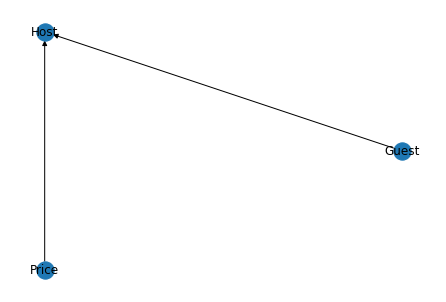

In [34]:
pos = nx.circular_layout(model)
nx.draw(model, pos=pos, with_labels=True) 